In [20]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
reg = linear_model.LinearRegression()
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC

In [21]:
CSGOplayerstats = pd.read_csv('counter-strike/playerStats.csv')
CSGOplayerstats.head(10)

,Map,Player,Kills,Deaths,ADR,KAST%,Rating,MatchID
0,Nuke,4216,22,19,85.0,69.0,1.17,2311133/binary-dragons-vs-alpha-binary-dragons...
1,Nuke,3543,26,23,83.5,58.6,1.10,2311133/binary-dragons-vs-alpha-binary-dragons...
2,Nuke,3972,20,23,78.2,75.9,1.02,2311133/binary-dragons-vs-alpha-binary-dragons...
3,Nuke,2476,17,20,68.1,79.3,0.97,2311133/binary-dragons-vs-alpha-binary-dragons...
4,Nuke,2299,17,20,66.3,65.5,0.86,2311133/binary-dragons-vs-alpha-binary-dragons...
5,Nuke,11915,28,21,99.8,65.5,1.35,2311133/binary-dragons-vs-alpha-binary-dragons...
6,Nuke,12802,20,17,78.2,75.9,1.20,2311133/binary-dragons-vs-alpha-binary-dragons...
7,Nuke,7590,21,24,85.6,65.5,1.03,2311133/binary-dragons-vs-alpha-binary-dragons...
8,Nuke,2982,18,20,66.6,69.0,1.00,2311133/binary-dragons-vs-alpha-binary-dragons...
9,Nuke,9903,18,20,57.5,65.5,0.87,2311133/binary-dragons-vs-alpha-binary-dragons...


In [22]:
X = CSGOplayerstats[['Player', 'Deaths', 'KAST%', 'Rating']]
y = CSGOplayerstats['Kills']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [25]:

CSGOplayerstats = LassoLarsCV(cv=10, precompute= False).fit(X_train,y_train)

In [26]:
alphas = np.logspace(-4, -1, 10)
scores = np.empty_like(alphas)
for i,a in enumerate(alphas):
    lasso = linear_model.Lasso()
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    scores[i] = lasso.score(X_test, y_test)
    print(a, lasso.coef_)

0.0001 [ -5.80640747e-06   8.53284979e-01  -5.38930280e-02   2.01045687e+01]
0.000215443469003 [ -5.80698975e-06   8.53249983e-01  -5.38350728e-02   2.01017475e+01]
0.000464158883361 [ -5.80824341e-06   8.53174592e-01  -5.37102024e-02   2.00956693e+01]
0.001 [ -5.81094639e-06   8.53012158e-01  -5.34412020e-02   2.00825747e+01]
0.00215443469003 [ -5.81676652e-06   8.52662217e-01  -5.28616189e-02   2.00543624e+01]
0.00464158883361 [ -5.82931386e-06   8.51908262e-01  -5.16130444e-02   1.99935833e+01]
0.01 [ -5.85635028e-06   8.50283898e-01  -4.89231202e-02   1.98626402e+01]
0.0215443469003 [ -5.91462139e-06   8.46784225e-01  -4.31281300e-02   1.95805391e+01]
0.0464158883361 [ -6.04014790e-06   8.39244464e-01  -3.06430242e-02   1.89727659e+01]
0.1 [ -6.31062258e-06   8.23000404e-01  -3.74511268e-03   1.76633699e+01]


In [27]:
#Predict Output
predicted= lasso.predict(X_test)
predicted

array([  5.77536023,  25.92580941,   7.54129012, ...,  24.35456617,
        21.88527461,  13.95745982])

In [30]:
lasso.score(X, y)
#accuracy_score(predicted, normalize = True)

0.85651049810352919

In [31]:
lassocv = linear_model.LassoCV()
lassocv.fit(X, y)
lassocv_score = lassocv.score(X, y)
lassocv_alpha = lassocv.alpha_
print('CV', lassocv.coef_)


CV [ -7.96439131e-06   6.65204091e-01   2.29610030e-01   5.85605464e+00]


In [34]:
lassocv.score(X, y)

0.65398240476028424

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

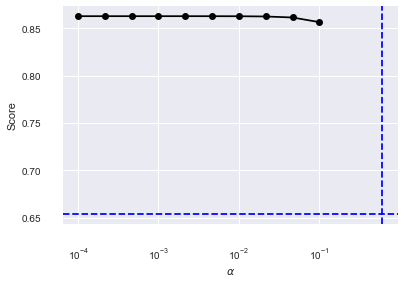

In [33]:

plt.plot(alphas, scores, '-ko')
plt.axhline(lassocv_score, color='b', ls='--')
plt.axvline(lassocv_alpha, color='b', ls='--')
plt.xlabel(r'$\alpha$')
plt.ylabel('Score')
plt.xscale('log')
sns.despine(offset=15)